# IntPic

This is a notebook showing some drawings related to numerical semigroups produced with the package [IntPic](https://www.gap-system.org/Packages/intpic.html).

We start by loading the package and setting the scale to 1.5, so that the pictures show bigger in the notebook.

In [2]:
LoadPackage("IntPic");
IP_TikzDefaultOptionsForArraysOfIntegers.scale:="1.5";;

true

Next we emphasize the "small elements" of the numerical semigroup $\langle 5,7\rangle$.

In [5]:
ns:=NumericalSemigroup(13,15,17);;
tkz := TikzCodeForNumericalSemigroup(ns,["small_elements"]);;
JupyterSplashTikZ(tkz);

We can modify the options to display the semigroup on a table instead.

In [9]:
ns := NumericalSemigroup(5,7);; 
opts:=rec(ns_table := true,negatives:=false);;
tkz := TikzCodeForNumericalSemigroup(ns,["small_elements"],opts);;
JupyterSplashTikZ(tkz);

In [13]:
opts := rec(ns_table:=true,colors:=["blue", "red!70", "-red", "black!40"]);;
highlights := ["conductor", "min_generators", "small_elements"];;
tkz := TikzCodeForNumericalSemigroup(ns,highlights,opts);;
JupyterSplashTikZ(tkz);

In [18]:
ns := NumericalSemigroup(7,11,38,41);;
highlights := ["conductor", "min_generators", "small_elements"];;
options := rec(ns_table:=true,colors:=["blue", "red!70", "-red", "black!40"],negatives:=false);;
tkz := TikzCodeForNumericalSemigroup(ns,highlights,options);;
JupyterSplashTikZ(tkz);

In [19]:
jstpng:= function(tikz)
    local tmpdir, fn, header, ltx, pngfile, stream, tojupyter, b64file,img, pngdata;

    header:=Concatenation( "\\documentclass[crop,tikz]{standalone}\n",
                    "\\usepackage{pgfplots}",
                    "\\makeatletter\n",
                    "\\batchmode\n",
                    "\\nonstopmode\n",
                    "\\begin{document}");
    header:=Concatenation(header, tikz);
    header:=Concatenation(header,"\\end{document}");

    tmpdir := DirectoryTemporary();
    fn := Filename( tmpdir, "svg_get" );

    PrintTo( Concatenation( fn, ".tex" ), header );

    ltx := Concatenation( "pdflatex -shell-escape --output-directory ",
                   Filename( tmpdir, "" ), " ",
                   Concatenation( fn, ".tex" ), " > ", Concatenation( fn, ".log2" ) );
    Exec( ltx );

    if not( IsExistingFile( Concatenation(fn, ".pdf") ) ) then
        tojupyter := rec( json := true, name := "stdout",
                          data := "No pdf was created; pdflatex is installed in your system?" );
    else
        pngfile := Concatenation( fn, ".png" );
        ltx := Concatenation( "magick -density 300  ", Concatenation( fn, ".pdf" ), " -trim ", pngfile );
        Exec( ltx );

        b64file := Concatenation( fn, ".b64" );
        ltx := Concatenation( "base64 -i ", pngfile, " >> ", b64file );
        Exec( ltx );

        if not( IsExistingFile( pngfile ) ) then
            Print("Fallo\n");
            tojupyter := rec( json := true, name := "stdout",
                              data := "No png was created; magick is installed in your system?" );
        fi;
        stream := InputTextFile( b64file );
        if stream <> fail then
            pngdata := ReadAll( stream );
            CloseStream( stream );
        else
            tojupyter := rec( json := true, name := "stdout",
                                data := Concatenation( "Unable to render ", tikz ), metadata := rec() );
            return JupyterRenderable(tojupyter.data, tojupyter.metadata);
        fi;
    fi;
    img:=Concatenation("<img src='data:image/png;base64,", pngdata,"'>");
    return Objectify( JupyterRenderableType, rec(  data := rec( ("text/html") := img), metadata:=rec() ));
end;

function( tikz ) ... end


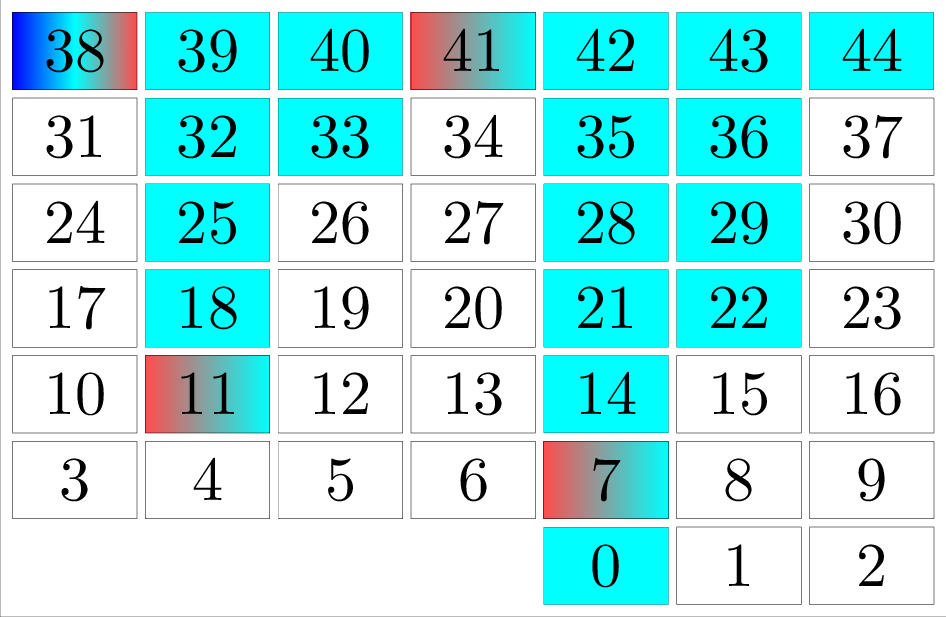

In [24]:
ns := NumericalSemigroup(7,11,38,41);;
highlights := ["conductor", "min_generators", "small_elements"];;
options := rec(ns_table:=true,colors:=["blue", "red!70", "-red", "black!40"],negatives:=false);;
tkz := TikzCodeForNumericalSemigroup(ns,highlights,options);;
jstpng(tkz);